In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
advertising_file_path= "./csv/advertising.csv"
advertising = pd.read_csv(advertising_file_path)
advertising.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

In [3]:
advertising.shape

(200, 4)

Sales   variable  value
0     22.1         TV  230.1
1     10.4         TV   44.5
2     12.0         TV   17.2
3     16.5         TV  151.5
4     17.9         TV  180.8
..     ...        ...    ...
595    7.6  Newspaper   13.8
596   14.0  Newspaper    8.1
597   14.8  Newspaper    6.4
598   25.5  Newspaper   66.2
599   18.4  Newspaper    8.7

[600 rows x 3 columns]

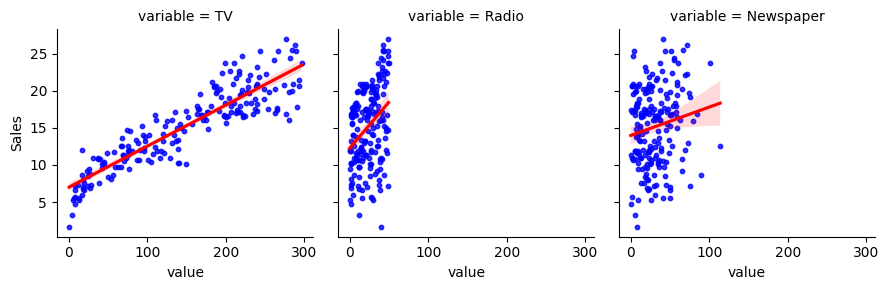

In [4]:
advertising_grid = pd.melt(advertising, id_vars="Sales", value_vars=["TV", "Radio", "Newspaper"])
g = sns.FacetGrid(advertising_grid, col="variable")
g.map(sns.regplot, "value", "Sales", ci=95, scatter_kws={"color": "blue", "s": 10},
      line_kws={"color":"red"})
advertising_grid

<Axes: xlabel='TV', ylabel='Sales'>

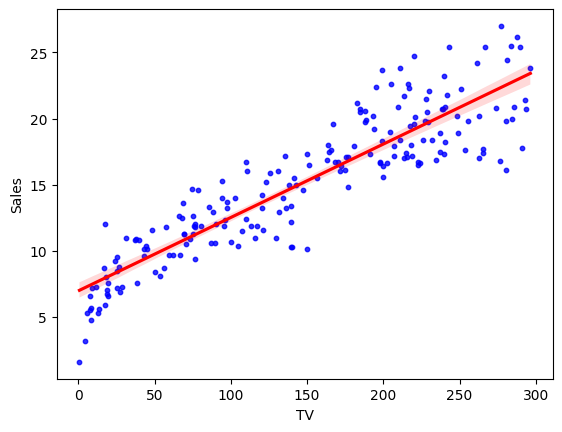

In [5]:
sns.regplot(data=advertising, x="TV", y="Sales", ci=95, scatter_kws={"color": "blue", "s": 10}, line_kws={"color": "red"})

<Axes: xlabel='Radio', ylabel='Sales'>

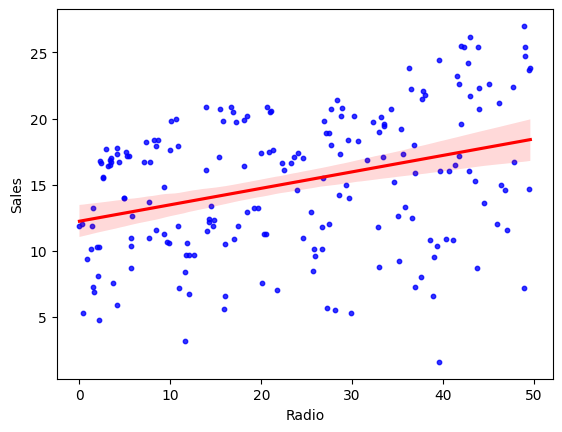

In [6]:
sns.regplot(data=advertising, x="Radio", y="Sales", ci=95, scatter_kws={"color": "blue", "s": 10}, line_kws={"color": "red"})

<Axes: xlabel='Newspaper', ylabel='Sales'>

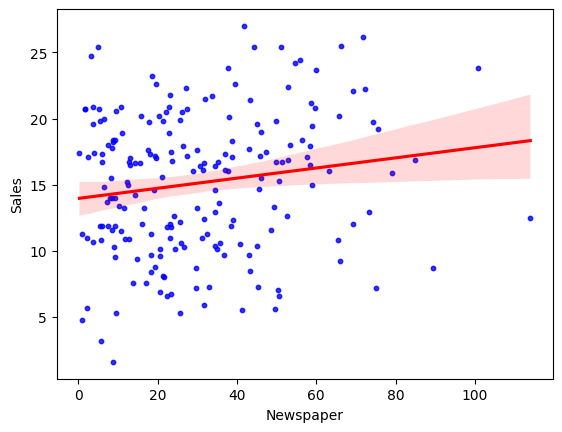

In [7]:
sns.regplot(data=advertising, x="Newspaper", y="Sales", ci=95, scatter_kws={"color": "blue", "s": 10}, line_kws={"color": "red"})

In [8]:
beta_0=6.975
beta_1=0.055

mean_y=advertising.Sales.mean()
mean_y

tss_i=advertising.Sales.apply(lambda yi: (yi-mean_y)**2)
tss = tss_i.sum()
tss

y_hat_i=beta_0+beta_1*advertising.TV
y_hat_i

i_count = advertising.shape[0]
rss_i= [(advertising.Sales[i]-y_hat_i[i])**2 for i in range(i_count)]

rss = sum(rss_i)
rss

r2=(tss-rss)/tss

print("R2: ",np.round(r2,3))

R2:  0.812


In [9]:
import statsmodels.api as sm

X_t=np.array(advertising.TV, ndmin=2)
X=np.transpose(X_t)
y=advertising.Sales

X=sm.add_constant(X)

model=sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Fri, 23 May 2025   Prob (F-statistic):           7.93e-74
Time:                        12:32:36   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0

## üìä An√°lisis de Resultados del Modelo de Regresi√≥n Lineal

A continuaci√≥n se presenta un an√°lisis detallado del resultado del m√©todo `.summary()` aplicado a un modelo de regresi√≥n lineal simple (una variable independiente).

---

### üßæ Informaci√≥n General del Modelo

| M√©trica                 | Valor                      | Interpretaci√≥n |
|-------------------------|----------------------------|----------------|
| **Dep. Variable**       | `Sales`                    | Variable dependiente: ventas. |
| **Model**               | `OLS` (Ordinary Least Squares) | M√©todo de regresi√≥n lineal por m√≠nimos cuadrados. |
| **No. Observations**    | 200                        | N√∫mero de observaciones en el dataset. |
| **Df Residuals**        | 198                        | Grados de libertad residuales (200 - 2 par√°metros). |
| **Df Model**            | 1                          | Solo hay una variable predictora. |
| **R-squared**           | **0.812**                  | El 81.2% de la varianza en `Sales` es explicada por el modelo. |
| **Adj. R-squared**      | 0.811                      | R¬≤ ajustado por n√∫mero de predictores; muy cercano a R¬≤, lo que sugiere un modelo ajustado correctamente. |
| **F-statistic**         | 856.2                      | Estad√≠stico F del modelo. |
| **Prob (F-statistic)**  | 7.93e-74                   | Valor p extremadamente bajo: el modelo es altamente significativo. |
| **AIC / BIC**           | 902.0 / 908.6              | Criterios de informaci√≥n, √∫tiles para comparar modelos (menor es mejor). |

---

### üìê Coeficientes del Modelo

| Par√°metro | Coeficiente | Std. Error | t-valor | Valor-p | Intervalo 95% |
|-----------|-------------|------------|---------|---------|----------------|
| **const** | 6.9748      | 0.323      | 21.624  | 0.000   | [6.339, 7.611] |
| **x1**    | 0.0555      | 0.002      | 29.260  | 0.000   | [0.052, 0.059] |

**Interpretaci√≥n:**
- El intercepto (`const`) indica que si la inversi√≥n en publicidad es 0, se espera que las ventas sean aproximadamente **6.97 unidades**.
- Por cada unidad adicional de inversi√≥n en publicidad (en este caso TV), las ventas aumentan en promedio **0.0555 unidades**.
- Ambos coeficientes son altamente significativos (**valor p < 0.05**).

---

### üìä Pruebas de Supuestos y Calidad del Modelo

| M√©trica           | Valor      | Interpretaci√≥n |
|-------------------|------------|----------------|
| **Omnibus**       | 0.013      | Prueba de normalidad de residuos. Valor bajo ‚Üí residuos normales. |
| **Prob(Omnibus)** | 0.993      | > 0.05 ‚Üí no se rechaza la normalidad. |
| **Jarque-Bera**   | 0.043      | Alternativa a Omnibus. Valor bajo y p-alto. |
| **Prob(JB)**      | 0.979      | Confirma que los residuos son normales. |
| **Skew**          | -0.018     | Asimetr√≠a casi nula ‚Üí distribuci√≥n sim√©trica. |
| **Kurtosis**      | 2.938      | Cercana a 3 ‚Üí curtosis de una normal. |
| **Durbin-Watson** | 2.029      | Cerca de 2 ‚Üí no hay autocorrelaci√≥n en los residuos. |
| **Cond. No.**     | 338        | < 1000 ‚Üí no hay problemas graves de multicolinealidad. |

---

### ‚úÖ Conclusi√≥n

El modelo presenta un **excelente ajuste** con un R¬≤ de **0.812**, y el coeficiente del predictor (TV) es altamente significativo. Los residuos cumplen con los supuestos de normalidad y no hay evidencia de autocorrelaci√≥n. Es un **modelo v√°lido y confiable** para predecir ventas a partir de la inversi√≥n en televisi√≥n.

---


## üßÆ F√≥rmulas de las M√©tricas del Modelo de Regresi√≥n Lineal (`.summary()`)

A continuaci√≥n se presentan las f√≥rmulas utilizadas para calcular las m√©tricas clave que aparecen en el resumen del modelo `OLS` (m√≠nimos cuadrados ordinarios).

---

### üìå 1. Coeficientes de Regresi√≥n

Sea $X$ la matriz de predictores (con constante) y $y$ el vector de la variable dependiente:

$$
\hat{\beta} = (X^TX)^{-1}X^Ty
$$

---

### üìä 2. Predicciones

Predicciones del modelo para cada observaci√≥n:

$$
\hat{y} = X \hat{\beta}
$$

---

### üéØ 3. Error Cuadr√°tico Total (Suma de Cuadrados Total)

Cantidad total de variaci√≥n en los datos:

$$
SS_{tot} = \sum_{i=1}^n (y_i - \bar{y})^2
$$

---

### üìâ 4. Suma de Cuadrados del Residuo (Error)

Mide la discrepancia entre los valores observados y los predichos:

$$
SS_{res} = \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

---

### üìà 5. Coeficiente de Determinaci√≥n ($R^2$)

Proporci√≥n de la varianza explicada por el modelo:

$$
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
$$

---

### üßÆ 6. $R^2$ Ajustado

Corrige $R^2$ teniendo en cuenta el n√∫mero de predictores $k$ y el n√∫mero de observaciones $n$:

$$
R^2_{adj} = 1 - \left( \frac{SS_{res}/(n - k - 1)}{SS_{tot}/(n - 1)} \right)
$$

---

### üìè 7. Error Est√°ndar de los Coeficientes

Se obtiene de la ra√≠z cuadrada de la diagonal de la matriz de varianza-covarianza de los coeficientes:

$$
\text{SE}(\hat{\beta}) = \sqrt{ \hat{\sigma}^2 (X^T X)^{-1} }
$$

donde

$$
\hat{\sigma}^2 = \frac{SS_{res}}{n - k - 1}
$$

---

### üß™ 8. Estad√≠stico t para cada coeficiente

Para evaluar si un coeficiente es significativamente distinto de 0:

$$
t = \frac{\hat{\beta}_j}{SE(\hat{\beta}_j)}
$$

---

### üìâ 9. Valor-p (P>|t|)

Probabilidad de obtener un valor de $t$ igual o m√°s extremo si $H_0: \beta_j = 0$ es cierta.

---

### üî¢ 10. Intervalo de Confianza del 95%

Para cada coeficiente:

$$
\hat{\beta}_j \pm t_{\alpha/2, df} \cdot SE(\hat{\beta}_j)
$$

---

### üß™ 11. Estad√≠stico F del Modelo

Eval√∫a si el modelo completo tiene poder predictivo:

$$
F = \frac{(SS_{tot} - SS_{res})/k}{SS_{res}/(n - k - 1)} = \frac{R^2 / k}{(1 - R^2)/(n - k - 1)}
$$

---

### üìê 12. Durbin-Watson (Autocorrelaci√≥n de los residuos)

Eval√∫a si hay correlaci√≥n entre residuos consecutivos:

$$
DW = \frac{\sum_{i=2}^n (e_i - e_{i-1})^2}{\sum_{i=1}^n e_i^2}
$$

donde $e_i = y_i - \hat{y}_i$

---

### üìä 13. Omnibus / Jarque-Bera (Normalidad de residuos)

- Omnibus combina asimetr√≠a y curtosis.
- Jarque-Bera:

$$
JB = \frac{n}{6} \left( S^2 + \frac{(K - 3)^2}{4} \right)
$$

donde:
- $S$: Asimetr√≠a
- $K$: Curtosis

---

Estas m√©tricas permiten evaluar tanto el **ajuste global del modelo**, como la **significancia estad√≠stica** de cada predictor y la validez de los supuestos de regresi√≥n lineal.



## üß† Mapa Conceptual de las M√©tricas de Regresi√≥n Lineal

Este esquema resume las principales m√©tricas y pruebas estad√≠sticas entregadas por `.summary()` de `statsmodels`, y c√≥mo se relacionan entre s√≠.

---

```text
                  +---------------------------+
                  |   Modelo de Regresi√≥n     |
                  |      Lineal OLS           |
                  +------------+--------------+
                               |
                               v
        +----------------------+----------------------+
        |                     Ajuste                  |
        +----------------------+----------------------+
        | Coeficientes Œ≤       |  R¬≤ y R¬≤ Ajustado     |
        |  - Intercepto        |  - Proporci√≥n de      |
        |  - Pendiente(s)      |    varianza explicada |
        +----------------------+----------------------+
                               |
                               v
        +----------------------+----------------------+
        |           Evaluaci√≥n de Significancia       |
        +----------------------+----------------------+
        | t-valor              | F-estad√≠stico         |
        | Valor-p (P>|t|)      | Valor-p F             |
        | Intervalo 95% CI     |                       |
        +----------------------+----------------------+
                               |
                               v
        +----------------------+----------------------+
        |      Supuestos del Modelo y Diagn√≥stico     |
        +----------------------+----------------------+
        | Normalidad de errores  |   Independencia     |
        | - Jarque-Bera (JB)     | - Durbin-Watson     |
        | - Omnibus              |                      |
        | - Skew / Kurtosis      |                      |
        +------------------------+---------------------+
                               |
                               v
        +------------------------+
        |    M√©tricas de Penalizaci√≥n (Comparaci√≥n)   |
        |    - AIC (Akaike Information Criterion)     |
        |    - BIC (Bayesian Information Criterion)   |
        +------------------------+



## üìè Intervalo de Confianza en Regresi√≥n Lineal

En un modelo de regresi√≥n lineal, los **intervalos de confianza** nos dicen con qu√© precisi√≥n estimamos los coeficientes del modelo (como la pendiente o el intercepto).

Cuando estimamos un coeficiente $\hat{\beta}$, no obtenemos su valor exacto en la poblaci√≥n, sino una estimaci√≥n basada en una muestra. El intervalo de confianza indica un rango en el cual, con cierta confianza (por ejemplo, 95%), creemos que se encuentra el valor real del coeficiente poblacional.

---

### üìê F√≥rmula del intervalo de confianza

El **intervalo de confianza al 95%** para un coeficiente $\hat{\beta}_j$ es:

$$
\hat{\beta}_j \pm t_{\alpha/2, \, df} \cdot SE(\hat{\beta}_j)
$$

Donde:

- $\hat{\beta}_j$ es el coeficiente estimado (por ejemplo, la pendiente de una variable independiente).
- $SE(\hat{\beta}_j)$ es el **error est√°ndar** de ese coeficiente.
- $t_{\alpha/2, \, df}$ es el valor cr√≠tico de la **distribuci√≥n t de Student**, con:
  - $\alpha = 1 - \text{nivel de confianza}$ (t√≠picamente 0.05 para 95%),
  - $df = n - k - 1$ grados de libertad (n = observaciones, k = variables independientes).

---

### ‚úÖ Interpretaci√≥n pr√°ctica

Un intervalo de confianza del 95% para un coeficiente significa:

> "Con un 95% de confianza, el verdadero valor de este coeficiente se encuentra dentro de este intervalo."

Si el intervalo **no incluye 0**, el coeficiente es **estad√≠sticamente significativo** (es poco probable que no tenga efecto).

---

### üìä Ejemplo con resultado real

Supongamos que una regresi√≥n lineal sobre la variable `TV` da:

- Coeficiente estimado: $\hat{\beta} = 0.0555$
- Error est√°ndar: $SE = 0.0019$
- Intervalo de confianza al 95%: $[0.052, 0.059]$

Esto se interpreta como:

> "Cada unidad adicional invertida en TV aumenta las ventas en promedio entre 0.052 y 0.059 unidades, con un 95% de confianza."

---

### üß† Comparaci√≥n r√°pida

| Tipo de intervalo     | ¬øQu√© estima?                                    |
|-----------------------|--------------------------------------------------|
| Intervalo de confianza| Valor verdadero del coeficiente (poblacional)   |
| Intervalo de predicci√≥n| Un nuevo valor futuro de la variable dependiente|



## üìä ¬øQu√© es el p-valor en regresi√≥n lineal?

El **p-valor** es una medida estad√≠stica que nos dice **cu√°n probable es obtener un resultado como el observado (o m√°s extremo) si la hip√≥tesis nula fuera cierta**.

En el contexto de la regresi√≥n lineal, usamos el p-valor para determinar si **una variable independiente tiene un efecto significativo sobre la variable dependiente**.

---

### üß™ Hip√≥tesis nula

En regresi√≥n, normalmente evaluamos:

- $H_0$: "El coeficiente es igual a cero" ‚Üí la variable **no tiene efecto**
- $H_1$: "El coeficiente es distinto de cero" ‚Üí la variable **s√≠ tiene efecto**

---

### üìê C√°lculo del p-valor

1. Se calcula el estad√≠stico t:

$$
t = \frac{\hat{\beta}}{SE(\hat{\beta})}
$$

2. Se compara ese valor t con la distribuci√≥n t de Student (seg√∫n los grados de libertad).
3. El **p-valor** es la **probabilidad** de observar ese valor (o uno m√°s extremo) si $H_0$ fuera cierta.

---

### ‚úÖ Interpretaci√≥n del p-valor

| p-valor         | Interpretaci√≥n                                               |
|-----------------|--------------------------------------------------------------|
| $p < 0.05$      | Rechazamos $H_0$. Hay evidencia estad√≠stica de un efecto.    |
| $p \geq 0.05$   | No rechazamos $H_0$. No hay evidencia suficiente de un efecto.|

> ‚ö†Ô∏è Un p-valor alto **no significa** que no haya efecto, solo que **no hay evidencia suficiente para afirmarlo**.

---

### üé≠ Analog√≠a: juicio en un tribunal

- Imagina que est√°s en un juicio.
- La hip√≥tesis nula es que el acusado es **inocente**.
- El p-valor representa **qu√© tan raro ser√≠a** el comportamiento observado **si fuera inocente**.

#### Ejemplos:

- **p-valor bajo (p < 0.05)**:  
  El comportamiento ser√≠a muy raro si fuera inocente ‚Üí probablemente **no lo es**.  
  ‚Üí Rechazamos $H_0$

- **p-valor alto (p ‚â• 0.05)**:  
  El comportamiento **no es tan raro** si fuera inocente ‚Üí **no podemos condenarlo**.  
  ‚Üí No rechazamos $H_0$

---

### üßæ Ejemplo con resultados reales

Supongamos que en un modelo de regresi√≥n obtenemos el siguiente resumen:


Interpretaci√≥n:

- El coeficiente estimado es **0.0555**, con un error est√°ndar de **0.0019**.
- El valor t es **29.26**.
- El p-valor es **0.000**, es decir, menor a 0.05.

‚úÖ **Conclusi√≥n:** Existe **evidencia estad√≠stica muy fuerte** de que esta variable tiene un efecto significativo sobre la variable dependiente.

---

### üìå Conclusi√≥n final

- El p-valor **no mide el tama√±o del efecto**, sino **la evidencia de que existe un efecto**.
- Es una herramienta clave para decidir si una variable es estad√≠sticamente relevante.
- Siempre debe interpretarse junto con otros elementos como los **intervalos de confianza**, el **R¬≤** y el **contexto del problema**.


## üìò ¬øQu√© es la Suma Total de los Cuadrados (SCT o TSS)?

La **Suma Total de los Cuadrados** mide **cu√°nto var√≠an los valores observados respecto a su media**. Es una forma de cuantificar la **variabilidad total** de la variable dependiente ($y$) antes de aplicar un modelo.

---

### üìê F√≥rmula

$$
SCT = \sum_{i=1}^n (y_i - \bar{y})^2
$$

- $y_i$: valor observado de la variable dependiente
- $\bar{y}$: media de todos los valores observados
- $n$: n√∫mero de observaciones

---

### üîç Interpretaci√≥n

- Si todos los valores de $y$ son iguales (no hay variaci√≥n), entonces $SCT = 0$.
- Cuanto mayor sea $SCT$, **mayor es la dispersi√≥n de los datos** respecto a su media.

---

### üìä ¬øPara qu√© se usa?

La SCT se utiliza para **evaluar qu√© tan bien un modelo de regresi√≥n explica la variabilidad de los datos**.

Junto con otras dos medidas:

- **SSE** (Error cuadr√°tico residual): variaci√≥n **no explicada** por el modelo
- **SSR** (Suma de cuadrados de regresi√≥n): variaci√≥n **explicada** por el modelo

Se cumple:

$$
SCT = SSR + SSE
$$

Y a partir de eso, se calcula el coeficiente de determinaci√≥n:

$$
R^2 = \frac{SSR}{SCT} = 1 - \frac{SSE}{SCT}
$$

---

### üß† En resumen

- La SCT representa la **variabilidad total** de los datos.
- Es la base para entender **qu√© tanto mejora** el modelo de regresi√≥n la predicci√≥n en comparaci√≥n con simplemente usar la media de los datos.



## üìò ¬øQu√© es la Suma de los Cuadrados de la Regresi√≥n (SSR)?

La **Suma de los Cuadrados de la Regresi√≥n** (SSR, por *Sum of Squares for Regression*) mide **cu√°nta variabilidad de la variable dependiente es explicada por el modelo** de regresi√≥n lineal.

---

### üßÆ F√≥rmula

$$
SSR = \sum_{i=1}^n (\hat{y}_i - \bar{y})^2
$$

- $\hat{y}_i$: valor predicho por el modelo para la observaci√≥n $i$
- $\bar{y}$: media de todos los valores observados de $y$
- $n$: n√∫mero total de observaciones

---

### üìê Interpretaci√≥n

- **SSR alto** ‚Üí El modelo logra explicar **una gran parte de la variabilidad** de los datos.
- **SSR bajo** ‚Üí El modelo **no explica bien** la variabilidad, y casi toda la variaci√≥n de los datos se mantiene "intacta".

---

### üîÅ Comparaci√≥n con otras m√©tricas

En regresi√≥n lineal, la **variabilidad total** de los datos se descompone en:

- **SCT**: Suma Total de los Cuadrados ‚Üí Variabilidad total
- **SSR**: Suma de Cuadrados de la Regresi√≥n ‚Üí Variabilidad explicada por el modelo
- **SSE**: Suma de Cuadrados del Error ‚Üí Variabilidad **no explicada** (residuos)

Relaci√≥n clave:

$$
SCT = SSR + SSE
$$

Y a partir de esta relaci√≥n, se define el coeficiente de determinaci√≥n $R^2$:

$$
R^2 = \frac{SSR}{SCT} = 1 - \frac{SSE}{SCT}
$$

---

### üß† En resumen

| M√©trica | ¬øQu√© mide?                             |
|--------|------------------------------------------|
| **SSR** | Variabilidad **explicada por el modelo** |
| **SSE** | Variabilidad **no explicada** (error)    |
| **SCT** | Variabilidad **total** de los datos      |

Una **SSR alta** y **SSE baja** son signos de que el modelo tiene **un buen poder predictivo**.



## üìä ¬øQu√© es la Suma de los Cuadrados de los Residuos (SSE)?

La **Suma de los Cuadrados de los Residuos** mide la **variabilidad de los datos** que **no es explicada** por el modelo de regresi√≥n. En otras palabras, es la **suma de los errores cuadr√°ticos** entre los valores observados y los valores predichos.

### üßÆ F√≥rmula

La f√≥rmula de la Suma de los Cuadrados de los Residuos (SSE) es:

$$
SSE = \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

- $y_i$: valor observado de la variable dependiente.
- $\hat{y}_i$: valor predicho por el modelo de regresi√≥n.
- $n$: n√∫mero total de observaciones.

---

### üìê Interpretaci√≥n

- **SSE alto**: Esto significa que el modelo no est√° explicando bien los datos y **los valores predichos se alejan mucho de los observados**. En otras palabras, el modelo tiene un **alto error**.
- **SSE bajo**: Indica que el modelo ajusta bien los datos, ya que **los valores predichos est√°n cerca de los valores reales**.

---

### üí° ¬øPor qu√© es importante la SSE?

La **SSE** es fundamental para evaluar la **calidad del modelo** en la regresi√≥n:

- Si **SSE es peque√±o**, significa que la diferencia entre las predicciones del modelo y los valores reales es peque√±a, lo que indica un **buen ajuste del modelo**.
- Si **SSE es grande**, significa que el modelo no es capaz de capturar la variabilidad de los datos, lo que sugiere que el modelo no es adecuado.

---

### üéØ Relaci√≥n con otras m√©tricas

La **SSE** es parte de la descomposici√≥n de la variabilidad total en la regresi√≥n, junto con la **Suma Total de los Cuadrados (SCT)** y la **Suma de los Cuadrados de la Regresi√≥n (SSR)**:

$$
SCT = SSR + SSE
$$

De esta relaci√≥n, podemos calcular el coeficiente de determinaci√≥n $R^2$:

$$
R^2 = 1 - \frac{SSE}{SCT}
$$

Este coeficiente muestra qu√© **proporci√≥n de la variabilidad** total ha sido explicada por el modelo.

---

### üß† En resumen

La **Suma de los Cuadrados de los Residuos (SSE)** es una medida clave para evaluar el ajuste del modelo de regresi√≥n, indicando cu√°nta variabilidad de la variable dependiente no es explicada por el modelo.

Un **SSE bajo** indica que el modelo est√° **haciendo buenas predicciones**, mientras que un **SSE alto** sugiere que el modelo tiene **un gran margen de error**.


## üìä Descomposici√≥n de la Variaci√≥n en Regresi√≥n Lineal

En un modelo de regresi√≥n lineal, la variaci√≥n total de los datos se puede descomponer en:

1. **Suma Total de los Cuadrados (SCT / TSS)**  
2. **Suma de Cuadrados de la Regresi√≥n (SCR / SSR)**  
3. **Suma de Cuadrados del Error (SCE / SSE)**

Se cumple la siguiente relaci√≥n fundamental:

$$
SCT = SSR + SSE
$$

---

### 1Ô∏è‚É£ Suma Total de los Cuadrados (SCT / TSS)

Mide la **variabilidad total** de la variable dependiente ($y$) respecto a su media.

$$
SCT = \sum_{i=1}^n (y_i - \bar{y})^2
$$

- $y_i$: valor observado
- $\bar{y}$: media de $y$
- Indica **cu√°nto var√≠an los datos sin considerar el modelo**.

---

### 2Ô∏è‚É£ Suma de Cuadrados de la Regresi√≥n (SCR / SSR)

Mide la **variabilidad explicada** por el modelo de regresi√≥n (es decir, cu√°nto logra predecir correctamente el modelo).

$$
SSR = \sum_{i=1}^n (\hat{y}_i - \bar{y})^2
$$

- $\hat{y}_i$: valor predicho por el modelo
- $\bar{y}$: media de $y$
- Representa **la parte de la variabilidad total que el modelo logra explicar**.

---

### 3Ô∏è‚É£ Suma de Cuadrados del Error (SCE / SSE)

Mide la **variabilidad que el modelo no logra explicar**, es decir, la **diferencia entre los valores reales y los predichos**.

$$
SSE = \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

- $y_i$: valor observado
- $\hat{y}_i$: valor predicho por el modelo
- Cuanto m√°s bajo sea el SSE, **mejor est√° ajustado el modelo**.

---

### üéØ Relaci√≥n entre ellas

$$
SCT = SSR + SSE
$$

Y a partir de esta relaci√≥n, podemos calcular el coeficiente de determinaci√≥n $R^2$:

$$
R^2 = \frac{SSR}{SCT} = 1 - \frac{SSE}{SCT}
$$

Este valor indica **qu√© proporci√≥n de la variaci√≥n total ha sido explicada por el modelo**.

---

### üß† En resumen

| M√©trica | ¬øQu√© mide?                            | Ideal |
|--------|----------------------------------------|--------|
| SCT    | Variabilidad total                     | ‚Äî      |
| SSR    | Variabilidad explicada por el modelo   | Alta   |
| SSE    | Variabilidad no explicada (el error)   | Baja   |



Datos:
x=1, y=1.20, ≈∑=1.06
x=2, y=2.10, ≈∑=2.06
x=3, y=2.90, ≈∑=3.05
x=4, y=4.10, ≈∑=4.05
x=5, y=5.00, ≈∑=5.04
x=6, y=5.90, ≈∑=6.04
x=7, y=7.10, ≈∑=7.03
x=8, y=7.80, ≈∑=8.03
x=9, y=9.20, ≈∑=9.02
x=10, y=10.10, ≈∑=10.02

Modelo: y = 0.067 + 0.995x
SCT (Total): 81.8640
SSR (Explicada): 81.7019
SSE (Error): 0.1621
R¬≤: 0.9980
t (beta_1): 63.5071
p-valor (beta_1): 0.000000
p-valor (beta_1) usando scipy.t.sf(): 0.000000


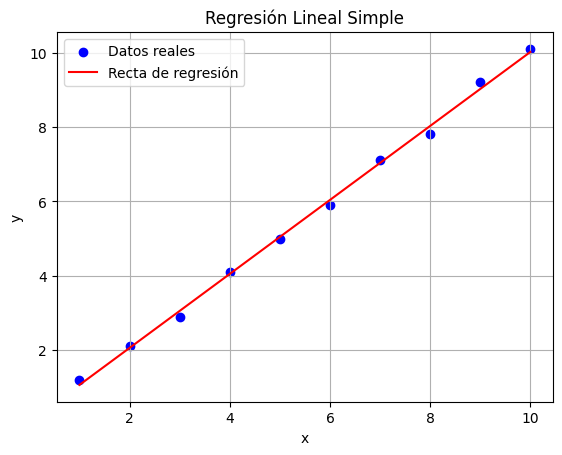

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4033.
Date:                Fri, 23 May 2025   Prob (F-statistic):           4.20e-12
Time:                        12:32:36   Log-Likelihood:                 6.4225
No. Observations:                  10   AIC:                            -8.845
Df Residuals:                       8   BIC:                            -8.240
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0667      0.097      0.686      0.5

C:\Users\Gabriel\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [10]:
import matplotlib.pyplot as plt
import math
from scipy.stats import t
import statsmodels.api as sm

# Datos simulados (x: gasto en publicidad, y: ventas)
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1.2, 2.1, 2.9, 4.1, 5.0, 5.9, 7.1, 7.8, 9.2, 10.1]
n = len(x)

# 1. Medias de x e y
x_mean = sum(x) / n
y_mean = sum(y) / n

# 2. C√°lculo manual de beta_1 y beta_0 (pendiente y ordenada al origen)
numer = sum((x[i] - x_mean) * (y[i] - y_mean) for i in range(n))
denom = sum((x[i] - x_mean)**2 for i in range(n))
beta_1 = numer / denom
beta_0 = y_mean - beta_1 * x_mean

# 3. Predicciones y c√°lculos necesarios
y_pred = [beta_0 + beta_1 * xi for xi in x]
residuos = [y[i] - y_pred[i] for i in range(n)]

# 4. C√°lculo de SCT, SSR, SSE
sct = sum((yi - y_mean)**2 for yi in y)
ssr = sum((y_pred[i] - y_mean)**2 for i in range(n))
sse = sum((y[i] - y_pred[i])**2 for i in range(n))

# 5. R¬≤
r2 = ssr / sct

# 6. C√°lculo del p-valor (para beta_1)
# Error est√°ndar de beta_1
residual_std_error = math.sqrt(sse / (n - 2))
se_beta_1 = residual_std_error / math.sqrt(sum((xi - x_mean)**2 for xi in x))

# Estad√≠stico t
t_stat = beta_1 / se_beta_1

# Aprox p-valor (doble cola) usando t ~ N(0,1) si n > 30. Aqu√≠ n=10, lo hacemos con f√≥rmula:
# Usamos una aproximaci√≥n para p-valor de t: P(|T| > t)
# Con grados de libertad = n - 2 = 8, usar tabla t o aproximaci√≥n normal
# Aqu√≠ para simplicidad, aproximamos usando Z si t > 2 y n peque√±o
def approx_p_value(t):
    # Aprox para cola normal
    return 2 * (1 - 0.5 * (1 + math.erf(abs(t) / math.sqrt(2))))

p_value = approx_p_value(t_stat)

# p-valor usando con scipy
df = n - 2
p_value_t = 2 * t.sf(abs(t_stat), df)

# Mostrar resultados
print("Datos:")
for xi, yi, ypi in zip(x, y, y_pred):
    print(f"x={xi}, y={yi:.2f}, ≈∑={ypi:.2f}")

print(f"\nModelo: y = {beta_0:.3f} + {beta_1:.3f}x")
print(f"SCT (Total): {sct:.4f}")
print(f"SSR (Explicada): {ssr:.4f}")
print(f"SSE (Error): {sse:.4f}")
print(f"R¬≤: {r2:.4f}")
print(f"t (beta_1): {t_stat:.4f}")
print(f"p-valor (beta_1): {p_value:.6f}")
print(f"p-valor (beta_1) usando scipy.t.sf(): {p_value_t:.6f}")

# Gr√°fico
plt.scatter(x, y, color="blue", label="Datos reales")
plt.plot(x, y_pred, color="red", label="Recta de regresi√≥n")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresi√≥n Lineal Simple")
plt.legend()
plt.grid(True)
plt.show()

X_t=np.array(x, ndmin=2)
X=np.transpose(X_t)
# y=advertising.Sales

X=sm.add_constant(X)

model=sm.OLS(y,X).fit()
print(model.summary())


### üìä C√°lculo detallado del p-valor en regresi√≥n lineal simple

En regresi√≥n lineal simple, el **p-valor del coeficiente** $\beta_1$ (la pendiente) nos indica si existe evidencia estad√≠stica para afirmar que hay una relaci√≥n entre la variable independiente $x$ y la variable dependiente $y$.

---

#### üß™ Prueba de hip√≥tesis

Se realiza una prueba de hip√≥tesis sobre $\beta_1$:

- Hip√≥tesis nula: $H_0: \beta_1 = 0$ (no hay relaci√≥n lineal entre $x$ e $y$)
- Hip√≥tesis alternativa: $H_1: \beta_1 \ne 0$ (s√≠ hay relaci√≥n lineal entre $x$ e $y$)

Para evaluar estas hip√≥tesis se sigue este procedimiento:

---

#### 1. C√°lculo del error est√°ndar de los residuos

Primero calculamos el **Error Est√°ndar de los Residuos**:

$$
S = \sqrt{ \frac{SSE}{n - 2} }
$$

Donde:

- $SSE$ es la **Suma de los Cuadrados de los Errores**
- $n$ es el n√∫mero de observaciones

---

#### 2. C√°lculo del error est√°ndar del coeficiente $\beta_1$

El error est√°ndar del coeficiente $\beta_1$ se calcula con:

$$
SE_{\beta_1} = \frac{S}{\sqrt{ \sum (x_i - \bar{x})^2 }}
$$

Esto mide la variabilidad esperada de $\beta_1$ si se repitiera el experimento muchas veces.

---

#### 3. Estad√≠stico t

Una vez obtenido $SE_{\beta_1}$, se calcula el estad√≠stico t:

$$
t = \frac{\beta_1}{SE_{\beta_1}}
$$

Este estad√≠stico nos indica cu√°ntas veces se aleja el valor estimado de $\beta_1$ del valor hipot√©tico $0$, en unidades del error est√°ndar.

---

#### 4. C√°lculo del p-valor

El **p-valor** se obtiene como la **probabilidad de observar un valor de $t$ tan extremo como el calculado, bajo la hip√≥tesis nula**:

$$
p = 2 \cdot P(T > |t|) \approx 2 \cdot \left(1 - \Phi(|t|)\right)
$$

Donde $\Phi(t)$ es la funci√≥n de distribuci√≥n acumulada de la **normal est√°ndar**.

En este ejemplo, usamos la funci√≥n de error ($`\text{erf}`$) para aproximar el valor:

$$
p \approx 2 \cdot \left(1 - \frac{1}{2} \left[1 + \text{erf}\left(\frac{|t|}{\sqrt{2}}\right)\right] \right)
$$

Esta aproximaci√≥n es razonable cuando $n$ es moderadamente grande ($n > 30$), aunque puede introducir error para muestras peque√±as.

---

#### üìå Interpretaci√≥n

- Si el p-valor es **menor que un umbral $\alpha$** (por ejemplo, $\alpha = 0.05$), se **rechaza la hip√≥tesis nula**.
- Esto implica que **existe evidencia estad√≠sticamente significativa** de que $\beta_1 \ne 0$.
- En otras palabras, **la variable independiente $x$ tiene un efecto significativo sobre $y$**.

---


### üìä C√°lculo del p-valor: aproximaci√≥n normal vs. distribuci√≥n t

En regresi√≥n lineal, al evaluar la significancia estad√≠stica del coeficiente $ \beta_1 $, se utiliza el **p-valor** que responde a la siguiente pregunta:

> ¬øCu√°l es la probabilidad de obtener un valor del estad√≠stico $ t $ tan extremo como el observado, asumiendo que la hip√≥tesis nula ($ \beta_1 = 0 $) es verdadera?

#### üí° Definici√≥n general del p-valor (bilateral)

$$
p = 2 \cdot P(T > |t|)
$$

Donde:

- $ T \sim t_{n-2} $ sigue una **distribuci√≥n t de Student** con $ n - 2 $ grados de libertad.
- $ |t| $ es el valor absoluto del estad√≠stico t calculado a partir del coeficiente estimado.

---

### üìâ Aproximaci√≥n normal (v√°lida solo para grandes muestras)

Cuando $ n $ es grande, la distribuci√≥n t converge a la normal est√°ndar $ \mathcal{N}(0, 1) $, y se puede usar la **funci√≥n de distribuci√≥n normal acumulada** $ \Phi(t) $ como aproximaci√≥n:

$$
p \approx 2 \cdot \left(1 - \Phi(|t|)\right)
$$

Esta aproximaci√≥n **no es precisa para muestras peque√±as** (por ejemplo, $ n < 30 $).

---

### ‚úÖ Soluci√≥n precisa con `scipy.stats.t.sf`

Para muestras peque√±as, se debe usar la **cola superior** de la distribuci√≥n t con los grados de libertad correctos:

```python
from scipy.stats import t
p = 2 * t.sf(abs(t_stat), df=n-2)


### ü§î ¬øPor qu√© se divide entre $ n - 2 $ y no entre $ n $ en el c√°lculo del error est√°ndar de los residuos?

Cuando calculamos el **error est√°ndar de los residuos** en regresi√≥n lineal simple, usamos la f√≥rmula:

$$
S = \sqrt{ \frac{SSE}{n - 2} }
$$

Donde:

- $ SSE = \sum_{i=1}^n (y_i - \hat{y}_i)^2 $ es la **Suma de los Cuadrados de los Errores (residuos)**.
- $ n $ es el n√∫mero total de observaciones.
- El denominador $ n - 2 $ representa los **grados de libertad**.

---

### üéì ¬øQu√© son los grados de libertad y por qu√© restamos 2?

En regresi√≥n lineal simple, estamos estimando **dos par√°metros** a partir de los datos:

- $ \beta_0 $: el intercepto (ordenada al origen)
- $ \beta_1 $: la pendiente de la recta

Cada par√°metro que se estima a partir de los datos **"consume" un grado de libertad**. Por lo tanto, al ajustar una recta a los datos:

- Comenzamos con $ n $ datos.
- Restamos 2 grados de libertad (uno por cada par√°metro estimado).

Resultado:

$$
\text{Grados de libertad} = n - 2
$$

---

### üìå ¬øQu√© pasar√≠a si dividi√©ramos por $ n $ en lugar de $ n - 2 $?

Si dividieras por $ n $, estar√≠as subestimando la varianza de los residuos, ya que no estar√≠as teniendo en cuenta que el modelo se ajust√≥ **con la ayuda de los propios datos**.

Este mismo principio se aplica cuando calculamos la **varianza muestral** y usamos $ n - 1 $ en lugar de $ n $:

$$
s^2 = \frac{1}{n - 1} \sum (x_i - \bar{x})^2
$$

---

### ‚úÖ Conclusi√≥n

La divisi√≥n entre $ n - 2 $ garantiza que el **error est√°ndar de los residuos** sea una **estimaci√≥n imparcial** de la verdadera varianza de los errores. Esto es fundamental para que los estad√≠sticos que derivan de √©l (como el error est√°ndar de los coeficientes, el estad√≠stico t y el p-valor) sean **v√°lidos y confiables**.

---


### üéì ¬øQu√© son los grados de libertad?

Los **grados de libertad** (en ingl√©s, *degrees of freedom*) son la cantidad de valores independientes que pueden variar en un c√°lculo estad√≠stico **despu√©s de imponer restricciones**.

---

### üßÆ Ejemplo sencillo

Sup√≥n que tienes tres n√∫meros $ x_1, x_2, x_3 $, y sabes que su media debe ser 10.

Si eliges libremente dos de ellos, por ejemplo:

- $ x_1 = 8 $
- $ x_2 = 12 $

Entonces el tercero ya est√° "fijado" por la media:

$$
x_3 = 3 \cdot 10 - (8 + 12) = 10
$$

As√≠, **solo dos valores pueden variar libremente**, porque la media es una **restricci√≥n**.

**Grados de libertad = n√∫mero total de datos - n√∫mero de restricciones**

---

### üìà En regresi√≥n lineal

En regresi√≥n lineal simple estimamos **dos par√°metros** a partir de los datos:

- $ \beta_0 $: intercepto
- $ \beta_1 $: pendiente

Esto impone **2 restricciones**, por lo tanto:

$$
\text{Grados de libertad} = n - 2
$$

donde $ n $ es el n√∫mero de observaciones.

---

### üìå ¬øPor qu√© es importante?

Los grados de libertad son fundamentales para:

- Calcular el **error est√°ndar de los residuos**
- Determinar qu√© distribuci√≥n usar (t de Student si $ n $ es peque√±o)
- Calcular correctamente el **p-valor** para evaluar si los coeficientes son significativos



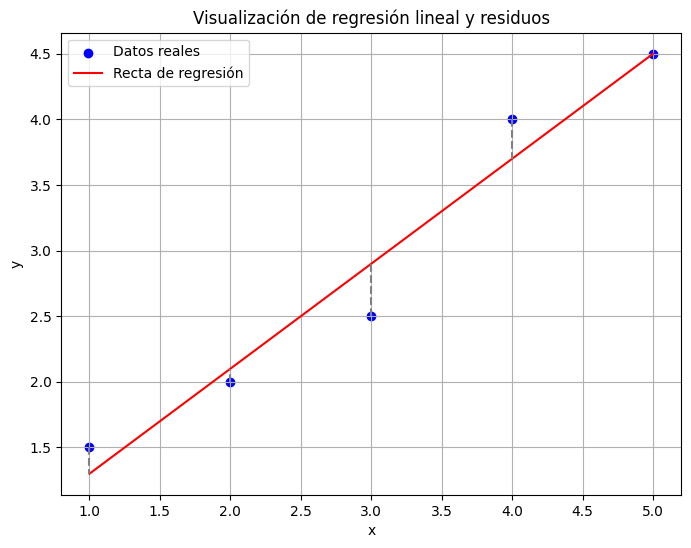

Grados de libertad residuales: 3


In [11]:
import matplotlib.pyplot as plt

# Datos de ejemplo
x = [1, 2, 3, 4, 5]
y = [1.5, 2.0, 2.5, 4.0, 4.5]
n = len(x)

# Ajuste manual de regresi√≥n lineal simple
x_mean = sum(x) / n
y_mean = sum(y) / n
beta_1 = sum((x[i] - x_mean) * (y[i] - y_mean) for i in range(n)) / sum((x[i] - x_mean)**2 for i in range(n))
beta_0 = y_mean - beta_1 * x_mean
y_pred = [beta_0 + beta_1 * xi for xi in x]

# Gr√°fico
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Datos reales')
plt.plot(x, y_pred, color='red', label='Recta de regresi√≥n')
for xi, yi, ypi in zip(x, y, y_pred):
    plt.plot([xi, xi], [yi, ypi], color='gray', linestyle='--')  # Residuos

plt.title('Visualizaci√≥n de regresi√≥n lineal y residuos')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# C√°lculo de grados de libertad
df_residuales = n - 2
print(f"Grados de libertad residuales: {df_residuales}")


### üéØ Visualizaci√≥n de los grados de libertad en regresi√≥n lineal

En una regresi√≥n lineal simple estamos ajustando una recta:

$$
\hat{y} = \beta_0 + \beta_1 x
$$

Esto implica que usamos **dos par√°metros**:

- $ \beta_0 $: el intercepto
- $ \beta_1 $: la pendiente

Cada par√°metro que estimamos impone una **restricci√≥n** sobre nuestros datos.  
Por tanto, de un total de $ n $ observaciones, solo $ n - 2 $ residuos pueden variar **libremente**.  
Ese n√∫mero es lo que llamamos **grados de libertad residuales**.

---

### üß† ¬øQu√© muestra el gr√°fico?

- Los **puntos azules** son las observaciones reales.
- La **l√≠nea roja** es el modelo ajustado por regresi√≥n.
- Las **l√≠neas grises punteadas** representan los **residuos**:  
  Diferencias entre los valores reales $ y_i $ y los valores predichos $ \hat{y}_i $.

---

### üìå Conclusi√≥n

Aunque hay $ n $ puntos de datos, solo $ n - 2 $ residuos son independientes.  
Esto se debe a que ya usamos 2 grados de libertad para calcular $ \beta_0 $ y $ \beta_1 $.  
Esos $ n - 2 $ grados de libertad son los que se usan, por ejemplo, para calcular el **error est√°ndar residual** y el **p-valor** de la pendiente.

$$
\text{Grados de libertad residuales} = n - 2
$$


### ‚ùì ¬øSe puede variar libremente todos los puntos y mantener la misma recta de regresi√≥n?

Supongamos que tenemos un conjunto de $n = 5$ puntos y hemos ajustado una recta por regresi√≥n lineal simple:

$$
\hat{y} = \beta_0 + \beta_1 x
$$

Esta recta se ajusta a los datos minimizando la **suma de los cuadrados de los residuos**:

$$
\text{SSE} = \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

---

### üß† ¬øPor qu√© no se pueden variar libremente todos los $n$ puntos?

Cuando ajustamos una regresi√≥n lineal, estamos estimando **dos par√°metros**:

- $ \beta_0 $ (intercepto)
- $ \beta_1 $ (pendiente)

Cada par√°metro que se estima **consume un grado de libertad**, por lo que quedan solo $n - 2$ grados de libertad para los residuos. Esto significa que **solo podemos variar $n - 2$ de los valores $y_i$ de forma independiente** si queremos que la recta ajustada se mantenga igual.

---

### üîç ¬øQu√© pasa si cambiamos todos los $y_i$?

Si modificamos todos los valores $y_i$ libremente:

- Cambiar√° la media $ \bar{y} $
- Cambiar√° la pendiente $ \beta_1 $ (que depende de $x_i$ y $y_i$)
- Cambiar√° el intercepto $ \beta_0 $

Por lo tanto, **la recta ya no ser√° la misma**.

---

### üìå Conclusi√≥n

> Para mantener fija la recta de regresi√≥n, **solo puedes cambiar $n - 2$ valores $y_i$ libremente**.  
> Los otros 2 est√°n condicionados por el hecho de que la recta ya fue ajustada usando esos datos.  
> Esto es lo que se conoce como **grados de libertad residuales** en regresi√≥n lineal:

$$
\text{Grados de libertad residuales} = n - 2
$$


Datos:
x=1, y=1.30, ≈∑=1.12
x=2, y=3.00, ≈∑=2.11
x=3, y=3.10, ≈∑=3.10
x=4, y=2.90, ≈∑=4.09
x=5, y=5.00, ≈∑=5.09
x=6, y=7.00, ≈∑=6.08
x=7, y=6.90, ≈∑=7.07
x=8, y=8.80, ≈∑=8.06
x=9, y=8.70, ≈∑=9.06
x=10, y=11.20, ≈∑=10.05
x=11, y=10.00, ≈∑=11.04
x=12, y=12.10, ≈∑=12.03
x=13, y=12.80, ≈∑=13.03
x=14, y=12.90, ≈∑=14.02
x=15, y=15.20, ≈∑=15.01
x=16, y=16.80, ≈∑=16.00
x=17, y=17.00, ≈∑=17.00
x=18, y=16.90, ≈∑=17.99
x=19, y=18.70, ≈∑=18.98
x=20, y=21.10, ≈∑=19.97
x=21, y=21.00, ≈∑=20.96
x=22, y=20.90, ≈∑=21.96
x=23, y=22.00, ≈∑=22.95
x=24, y=24.10, ≈∑=23.94
x=25, y=22.00, ≈∑=24.93
x=26, y=28.30, ≈∑=25.93
x=27, y=27.20, ≈∑=26.92
x=28, y=29.10, ≈∑=27.91
x=29, y=29.00, ≈∑=28.90
x=30, y=30.20, ≈∑=29.90

Modelo: y = 0.125 + 0.992x
SCT (Total): 2241.8387
SSR (Explicada): 2213.2316
SSE (Error): 28.6070
R¬≤: 0.9872
t (beta_1): 46.5432
p-valor (beta_1): 0.000000
p-valor (beta_1) usando scipy.t.sf(): 0.000000


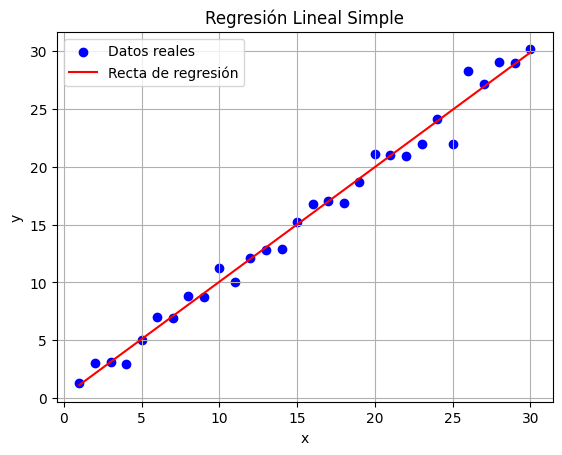

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     2166.
Date:                Fri, 23 May 2025   Prob (F-statistic):           4.56e-28
Time:                        12:32:36   Log-Likelihood:                -41.855
No. Observations:                  30   AIC:                             87.71
Df Residuals:                      28   BIC:                             90.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1253      0.379      0.331      0.7

In [12]:
import matplotlib.pyplot as plt
import math
from scipy.stats import t
import statsmodels.api as sm

# Nuevos datos para n = 30
x = list(range(1, 31))
y = [
    1.3, 3.0, 3.1, 2.9, 5.0, 7.0, 6.9, 8.8, 8.7, 11.2,
    10.0, 12.1, 12.8, 12.9, 15.2, 16.8, 17.0, 16.9, 18.7, 21.1,
    21.0, 20.9, 22.0, 24.1, 22.0, 28.3, 27.2, 29.1, 29.0, 30.2
]
n = len(x)

# 1. Medias de x e y
x_mean = sum(x) / n
y_mean = sum(y) / n

# 2. C√°lculo manual de beta_1 y beta_0 (pendiente y ordenada al origen)
numer = sum((x[i] - x_mean) * (y[i] - y_mean) for i in range(n))
denom = sum((x[i] - x_mean)**2 for i in range(n))
beta_1 = numer / denom
beta_0 = y_mean - beta_1 * x_mean

# 3. Predicciones y c√°lculos necesarios
y_pred = [beta_0 + beta_1 * xi for xi in x]
residuos = [y[i] - y_pred[i] for i in range(n)]

# 4. C√°lculo de SCT, SSR, SSE
sct = sum((yi - y_mean)**2 for yi in y)
ssr = sum((y_pred[i] - y_mean)**2 for i in range(n))
sse = sum((y[i] - y_pred[i])**2 for i in range(n))

# 5. R¬≤
r2 = ssr / sct

# 6. C√°lculo del p-valor (para beta_1)
# Error est√°ndar de beta_1
residual_std_error = math.sqrt(sse / (n - 2))
se_beta_1 = residual_std_error / math.sqrt(sum((xi - x_mean)**2 for xi in x))

# Estad√≠stico t
t_stat = beta_1 / se_beta_1

# Aprox p-valor (doble cola) usando t ~ N(0,1) si n > 30. Aqu√≠ n=10, lo hacemos con f√≥rmula:
# Usamos una aproximaci√≥n para p-valor de t: P(|T| > t)
# Con grados de libertad = n - 2 = 8, usar tabla t o aproximaci√≥n normal
# Aqu√≠ para simplicidad, aproximamos usando Z si t > 2 y n peque√±o
def approx_p_value(t):
    # Aprox para cola normal
    return 2 * (1 - 0.5 * (1 + math.erf(abs(t) / math.sqrt(2))))

p_value = approx_p_value(t_stat)

# p-valor usando con scipy
df = n - 2
p_value_t = 2 * t.sf(abs(t_stat), df)

# Mostrar resultados
print("Datos:")
for xi, yi, ypi in zip(x, y, y_pred):
    print(f"x={xi}, y={yi:.2f}, ≈∑={ypi:.2f}")

print(f"\nModelo: y = {beta_0:.3f} + {beta_1:.3f}x")
print(f"SCT (Total): {sct:.4f}")
print(f"SSR (Explicada): {ssr:.4f}")
print(f"SSE (Error): {sse:.4f}")
print(f"R¬≤: {r2:.4f}")
print(f"t (beta_1): {t_stat:.4f}")
print(f"p-valor (beta_1): {p_value:.6f}")
print(f"p-valor (beta_1) usando scipy.t.sf(): {p_value_t:.6f}")

# Gr√°fico
plt.scatter(x, y, color="blue", label="Datos reales")
plt.plot(x, y_pred, color="red", label="Recta de regresi√≥n")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresi√≥n Lineal Simple")
plt.legend()
plt.grid(True)
plt.show()

X_t=np.array(x, ndmin=2)
X=np.transpose(X_t)
# y=advertising.Sales

X=sm.add_constant(X)

model=sm.OLS(y,X).fit()
print(model.summary())

Datos:
x=1, y=5.30, ≈∑=5.22
x=2, y=5.00, ≈∑=5.21
x=3, y=5.10, ≈∑=5.21
x=4, y=5.90, ≈∑=5.20
x=5, y=5.00, ≈∑=5.20
x=6, y=5.00, ≈∑=5.19
x=7, y=5.90, ≈∑=5.19
x=8, y=5.80, ≈∑=5.18
x=9, y=5.70, ≈∑=5.18
x=10, y=5.20, ≈∑=5.17
x=11, y=5.00, ≈∑=5.16
x=12, y=5.10, ≈∑=5.16
x=13, y=4.80, ≈∑=5.15
x=14, y=4.90, ≈∑=5.15
x=15, y=4.20, ≈∑=5.14
x=16, y=4.80, ≈∑=5.14
x=17, y=4.00, ≈∑=5.13
x=18, y=4.90, ≈∑=5.13
x=19, y=4.70, ≈∑=5.12
x=20, y=4.10, ≈∑=5.12
x=21, y=6.00, ≈∑=5.11
x=22, y=5.90, ≈∑=5.10
x=23, y=6.00, ≈∑=5.10
x=24, y=5.10, ≈∑=5.09
x=25, y=5.00, ≈∑=5.09
x=26, y=5.30, ≈∑=5.08
x=27, y=5.20, ≈∑=5.08
x=28, y=5.10, ≈∑=5.07
x=29, y=5.00, ≈∑=5.07
x=30, y=5.20, ≈∑=5.06

Modelo: y = 5.224 + -0.005x
SCT (Total): 7.9520
SSR (Explicada): 0.0662
SSE (Error): 7.8858
R¬≤: 0.0083
t (beta_1): -0.4849
p-valor (beta_1): 0.627736
p-valor (beta_1) usando scipy.t.sf(): 0.631508


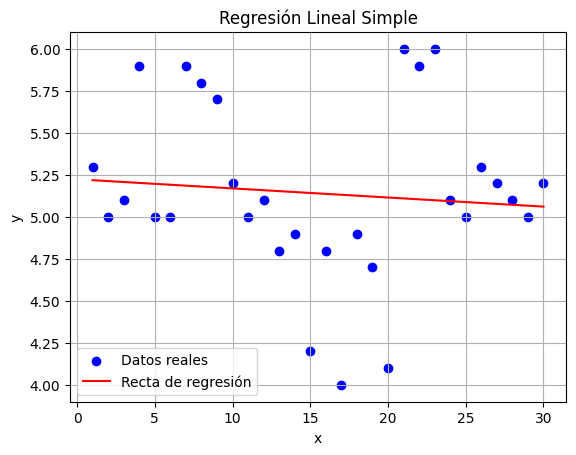

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                    0.2351
Date:                Fri, 23 May 2025   Prob (F-statistic):              0.632
Time:                        12:32:37   Log-Likelihood:                -22.526
No. Observations:                  30   AIC:                             49.05
Df Residuals:                      28   BIC:                             51.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2241      0.199     26.288      0.0

In [13]:
import matplotlib.pyplot as plt
import math
from scipy.stats import t
import statsmodels.api as sm

# Nuevos datos para n = 30
x = list(range(1, 31))
y = [
    5.3, 5.0, 5.1, 5.9, 5.0, 5.0, 5.9, 5.8, 5.7, 5.2,
    5.0, 5.1, 4.8, 4.9, 4.2, 4.8, 4.0, 4.9, 4.7, 4.1,
    6.0, 5.9, 6.0, 5.1, 5.0, 5.3, 5.2, 5.1, 5.0, 5.2
]
n = len(x)

# 1. Medias de x e y
x_mean = sum(x) / n
y_mean = sum(y) / n

# 2. C√°lculo manual de beta_1 y beta_0 (pendiente y ordenada al origen)
numer = sum((x[i] - x_mean) * (y[i] - y_mean) for i in range(n))
denom = sum((x[i] - x_mean)**2 for i in range(n))
beta_1 = numer / denom
beta_0 = y_mean - beta_1 * x_mean

# 3. Predicciones y c√°lculos necesarios
y_pred = [beta_0 + beta_1 * xi for xi in x]
residuos = [y[i] - y_pred[i] for i in range(n)]

# 4. C√°lculo de SCT, SSR, SSE
sct = sum((yi - y_mean)**2 for yi in y)
ssr = sum((y_pred[i] - y_mean)**2 for i in range(n))
sse = sum((y[i] - y_pred[i])**2 for i in range(n))

# 5. R¬≤
r2 = ssr / sct

# 6. C√°lculo del p-valor (para beta_1)
# Error est√°ndar de beta_1
residual_std_error = math.sqrt(sse / (n - 2))
se_beta_1 = residual_std_error / math.sqrt(sum((xi - x_mean)**2 for xi in x))

# Estad√≠stico t
t_stat = beta_1 / se_beta_1

# Aprox p-valor (doble cola) usando t ~ N(0,1) si n > 30. Aqu√≠ n=10, lo hacemos con f√≥rmula:
# Usamos una aproximaci√≥n para p-valor de t: P(|T| > t)
# Con grados de libertad = n - 2 = 8, usar tabla t o aproximaci√≥n normal
# Aqu√≠ para simplicidad, aproximamos usando Z si t > 2 y n peque√±o
def approx_p_value(t):
    # Aprox para cola normal
    return 2 * (1 - 0.5 * (1 + math.erf(abs(t) / math.sqrt(2))))

p_value = approx_p_value(t_stat)

# p-valor usando con scipy
df = n - 2
p_value_t = 2 * t.sf(abs(t_stat), df)

# Mostrar resultados
print("Datos:")
for xi, yi, ypi in zip(x, y, y_pred):
    print(f"x={xi}, y={yi:.2f}, ≈∑={ypi:.2f}")

print(f"\nModelo: y = {beta_0:.3f} + {beta_1:.3f}x")
print(f"SCT (Total): {sct:.4f}")
print(f"SSR (Explicada): {ssr:.4f}")
print(f"SSE (Error): {sse:.4f}")
print(f"R¬≤: {r2:.4f}")
print(f"t (beta_1): {t_stat:.4f}")
print(f"p-valor (beta_1): {p_value:.6f}")
print(f"p-valor (beta_1) usando scipy.t.sf(): {p_value_t:.6f}")

# Gr√°fico
plt.scatter(x, y, color="blue", label="Datos reales")
plt.plot(x, y_pred, color="red", label="Recta de regresi√≥n")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresi√≥n Lineal Simple")
plt.legend()
plt.grid(True)
plt.show()

X_t=np.array(x, ndmin=2)
X=np.transpose(X_t)
# y=advertising.Sales

X=sm.add_constant(X)

model=sm.OLS(y,X).fit()
print(model.summary())

### üìê MAE ‚Äî Mean Absolute Error

El **MAE (Error Absoluto Medio)** es una m√©trica que mide el **promedio de los errores absolutos** entre los valores observados \( y_i \) y los valores predichos por el modelo \( \hat{y}_i \).

Se define como:

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$

---

### üìå Interpretaci√≥n

- El MAE representa, en promedio, **cu√°nto se equivoca el modelo** al hacer sus predicciones.
- Cuanto menor sea el MAE, **mejor es el rendimiento del modelo**.
- A diferencia del MSE (Error Cuadr√°tico Medio), el MAE **no penaliza los errores grandes de forma cuadr√°tica**, por lo que es m√°s **robusto frente a valores at√≠picos (outliers)**.

---

### üß† Comparaci√≥n r√°pida

| M√©trica | F√≥rmula | Penaliza errores grandes |
|--------|---------|---------------------------|
| MAE | \( \frac{1}{n} \sum |y_i - \hat{y}_i| \) | ‚ùå No |
| MSE | \( \frac{1}{n} \sum (y_i - \hat{y}_i)^2 \) | ‚úÖ S√≠ |
| RMSE | \( \sqrt{\frac{1}{n} \sum (y_i - \hat{y}_i)^2} \) | ‚úÖ S√≠ |

---

### ‚úÖ ¬øCu√°ndo usar MAE?

- Si quieres una **medida interpretativa f√°cil** (el error promedio en las mismas unidades que la variable \( y \)).
- Cuando **los outliers no deben tener demasiado peso** en la evaluaci√≥n.


### üßÆ MSE ‚Äî Mean Squared Error

El **MSE (Error Cuadr√°tico Medio)** es una m√©trica que mide el **promedio de los cuadrados de los errores** entre los valores reales \( y_i \) y los valores predichos por el modelo \( \hat{y}_i \).

Se define como:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

---

### üìå Interpretaci√≥n

- El MSE calcula el **promedio de los errores al cuadrado**.
- Penaliza m√°s los errores grandes debido al uso del cuadrado.
- Cuanto m√°s peque√±o es el MSE, **mejor es el ajuste del modelo** a los datos.

---

### ‚öñÔ∏è Comparaci√≥n con MAE

A diferencia del MAE, que mide el promedio del **valor absoluto del error**, el MSE **amplifica los errores grandes** al elevarlos al cuadrado. Esto lo hace √∫til cuando se desea **castigar m√°s los errores severos**.

---

### üìê Relaci√≥n con otras m√©tricas

- **MAE (Mean Absolute Error)**: penaliza todos los errores de forma uniforme.
- **MSE (Mean Squared Error)**: penaliza m√°s los errores grandes.
- **RMSE (Root Mean Squared Error)**: es la ra√≠z cuadrada del MSE, devuelve el error promedio en las mismas unidades que \( y \):

$$
\text{RMSE} = \sqrt{\text{MSE}}
$$

---

### ‚úÖ ¬øCu√°ndo usar MSE?

- Cuando deseas que el modelo **pague un costo mayor por errores grandes**.
- En problemas donde los errores severos son especialmente problem√°ticos.


### üìè RMSE ‚Äî Root Mean Squared Error

El **RMSE (Ra√≠z del Error Cuadr√°tico Medio)** es una m√©trica que mide la **ra√≠z cuadrada del promedio de los errores al cuadrado** entre los valores reales \( y_i \) y los valores predichos \( \hat{y}_i \).

Se define como:

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

---

### üìå Interpretaci√≥n

- El RMSE indica **cu√°nto se desv√≠a el modelo en promedio** al realizar sus predicciones.
- Tiene la ventaja de que **mantiene las mismas unidades que la variable dependiente** \( y \), lo que lo hace m√°s interpretable que el MSE.
- Al igual que el MSE, **penaliza m√°s fuertemente los errores grandes**.

---

### üîÅ Relaci√≥n con otras m√©tricas

- **MAE** mide el error promedio sin elevar al cuadrado.
- **MSE** mide el error cuadr√°tico promedio, amplificando los errores grandes.
- **RMSE** devuelve el error en unidades comparables a \( y \), pero conservando la penalizaci√≥n cuadr√°tica del MSE.

---

### ‚úÖ ¬øCu√°ndo usar RMSE?

- Cuando necesitas una m√©trica que penalice errores grandes **y sea directamente interpretable en las unidades de la variable objetivo**.
- Muy usada en regresi√≥n, especialmente cuando se quiere **interpretar el error como "desviaci√≥n promedio"**.

---

### üß† F√≥rmulas de referencia

- MAE: 
  $$
  \text{MAE} = \frac{1}{n} \sum |y_i - \hat{y}_i|
  $$

- MSE:
  $$
  \text{MSE} = \frac{1}{n} \sum (y_i - \hat{y}_i)^2
  $$

- RMSE:
  $$
  \text{RMSE} = \sqrt{\text{MSE}}
  $$
